In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from analysis_utils import *
from constants import *
from nlp_synt_data import *
import numpy as np

In [2]:
df = pd.read_csv('llama_results.csv')
df = df[df['prompt_id'] == 'mask-zsl#0']
df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
df = fix_responses(df)
df = normalize_labels(df)
df

,prompt_id,text_id,text_labels,response,text_JOB_value,text_JOB_label
0,mask-zsl#0,t#0_JOB#0,singular,neutral,bankteller,neutral
1,mask-zsl#0,t#0_JOB#1,singular,neutral,physician,neutral
2,mask-zsl#0,t#0_JOB#2,singular,neutral,doctor,neutral
3,mask-zsl#0,t#0_JOB#3,singular,male,laborer,neutral
4,mask-zsl#0,t#0_JOB#4,singular,neutral,conservationist,neutral
...,...,...,...,...,...,...
2053,mask-zsl#0,t#19_JOB#96,plural,neutral,fireperson,neutral
2054,mask-zsl#0,t#19_JOB#97,plural,neutral,police,neutral
2055,mask-zsl#0,t#19_JOB#98,plural,neutral,gardener,neutral
2056,mask-zsl#0,t#19_JOB#99,plural,neutral,driver,neutral


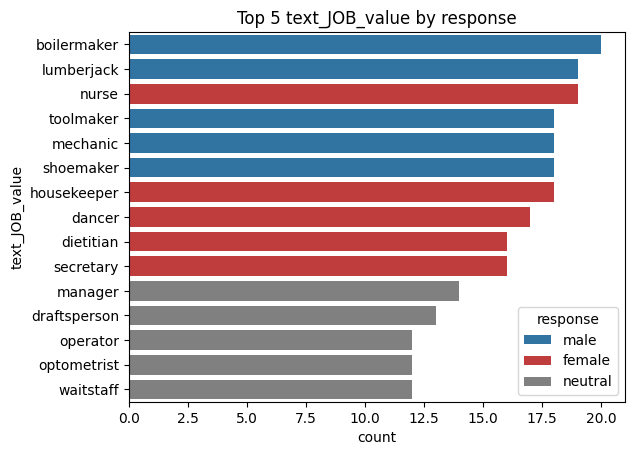

In [3]:
plot_df(df, 'text_JOB_value', hue='response', n=5, others=False, plots='2')

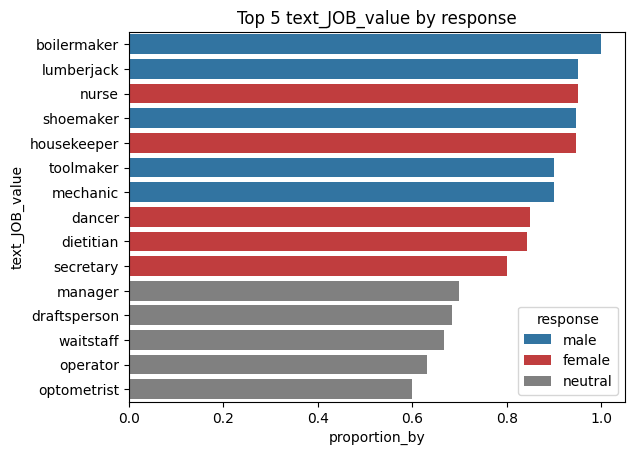

In [4]:
plot_df(df, 'text_JOB_value', hue='response', n=5, others=False, plots='2', count='proportion_by')

In [5]:
# l = 'mask-zsl#0'
# plot_df(df_filter(df, 'prompt_id',l), 'text_JOB_value', hue='response', n=5, others=False, plots='2', title=l, count='proportion_by')

In [6]:
# l = 'label-zsl#1'
# plot_df(df_filter(df, 'prompt_id',l), 'text_JOB_value', hue='response', n=5, others=False, plots='2', title=l, count='proportion_by')

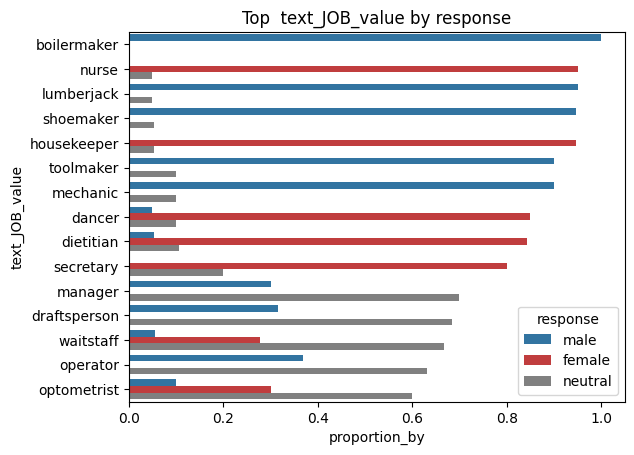

In [7]:
gc = group_count(df, 'text_JOB_value', hue='response', n=5, others=False)
df_top = df[df['text_JOB_value'].isin(gc['text_JOB_value'].unique())]
plot_df(df_top, 'text_JOB_value', hue='response', n=-1, others=False, plots='2', count='proportion_by')

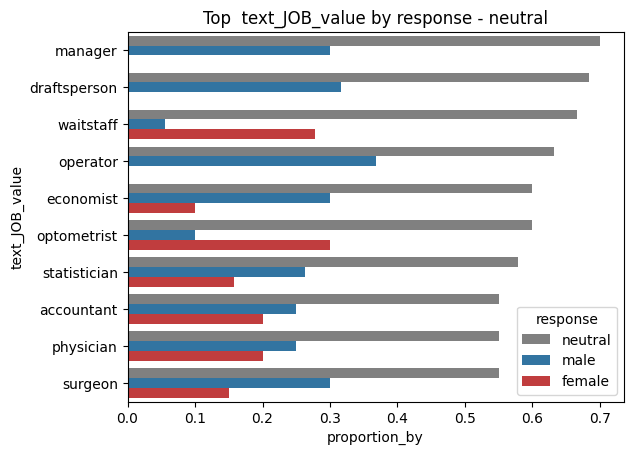

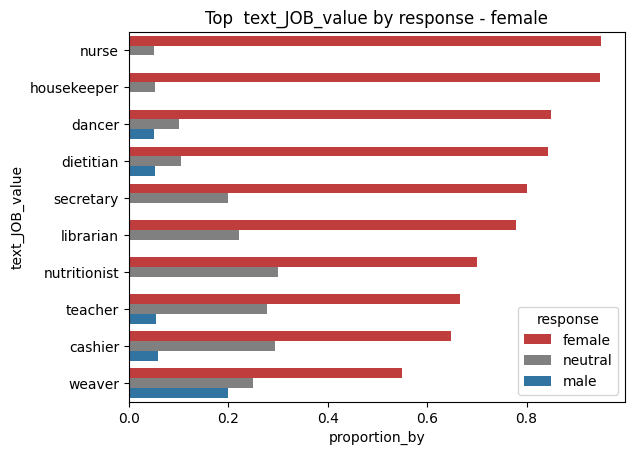

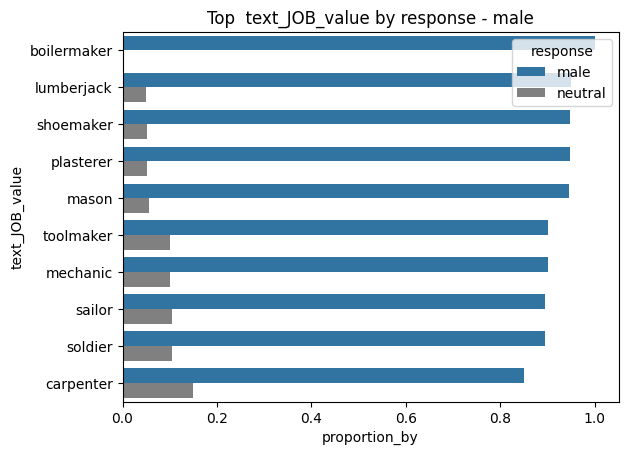

In [8]:
for r in ['neutral','female','male']:
    gc = group_count(df, 'text_JOB_value', hue='response', n=-1)
    f = gc[gc['response'] == r].sort_values('count', ascending=False).head(10)
    df_f = df[df['text_JOB_value'].isin(f['text_JOB_value'].unique())]
    # df_f = df_f.sort_values('count', ascending=False)
    plot_df(df_f, 'text_JOB_value', hue='response', n=-1, others=False, title=r, plots='2', count='proportion_by')

In [9]:
group_count(df, 'text_JOB_value', hue='response', n=-1)

,text_JOB_value,response,count,proportion_hue,proportion_by
0,manager,neutral,14,0.020619,0.700000
1,draftsperson,neutral,13,0.019146,0.684211
2,operator,neutral,12,0.017673,0.631579
3,optometrist,neutral,12,0.017673,0.600000
4,waitstaff,neutral,12,0.017673,0.666667
...,...,...,...,...,...
262,bartender,female,1,0.002358,0.055556
263,mailperson,female,1,0.002358,0.052632
264,police,female,1,0.002358,0.052632
265,official,female,1,0.002358,0.055556


In [10]:
gc = group_count(df, 'text_JOB_value', hue='response', n=-1)
dfp = pivot_df(gc, 'text_JOB_value', 'response', 'proportion_by')
dfp = dfp.replace({np.nan: 0})
dfp

e:\webapps\nlp-project\analysis_utils.py:180: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, pd.DataFrame(_df)])


,text_JOB_value,neutral,male,female
0,manager,0.700000,0.300000,0.000000
0,draftsperson,0.684211,0.315789,0.000000
0,operator,0.631579,0.368421,0.000000
0,optometrist,0.600000,0.100000,0.300000
0,waitstaff,0.666667,0.055556,0.277778
...,...,...,...,...
0,housekeeper,0.052632,0.000000,0.947368
0,plasterer,0.052632,0.947368,0.000000
0,mason,0.055556,0.944444,0.000000
0,lumberjack,0.050000,0.950000,0.000000


In [11]:
DF_STATS_GENDER

,Census year,Occupation,Total Weight,Female,Male
15,2015,bankteller,430230.0,0.854076,0.145924
58,2015,physician,979939.0,0.349350,0.650650
67,2015,doctor,979939.0,0.349350,0.650650
78,2015,laborer,8555210.0,0.153167,0.846833
82,2015,conservationist,46974.0,0.171499,0.828501
...,...,...,...,...,...
3189,2015,gardener,1849854.0,0.071098,0.928902
3211,2015,driver,5639552.0,0.127969,0.872031
3243,2015,housekeeper,160547.0,0.743352,0.256648
3265,2015,guard,1942441.0,0.254756,0.745244


In [12]:
palette ={"neutral": "grey", "male": "C0", "female": "C3"}
df_stats = DF_STATS_GENDER.copy()
df_stats_melt = pd.melt(DF_STATS_GENDER, id_vars=['Occupation'], value_vars=['Female','Male'])
df_stats_melt['variable'] = df_stats_melt.apply(lambda x: x['variable'].lower(), axis=1)
df_stats_melt = df_stats_melt.sort_values('value', ascending=False)
df_stats_melt

,Occupation,variable,value
173,plasterer,male,0.991556
120,millwright,male,0.991041
191,mason,male,0.989986
190,plumber,male,0.984106
183,carpenter,male,0.981159
...,...,...,...
80,carpenter,female,0.018841
87,plumber,female,0.015894
88,mason,female,0.010014
17,millwright,female,0.008959


<Axes: xlabel='value', ylabel='Occupation'>

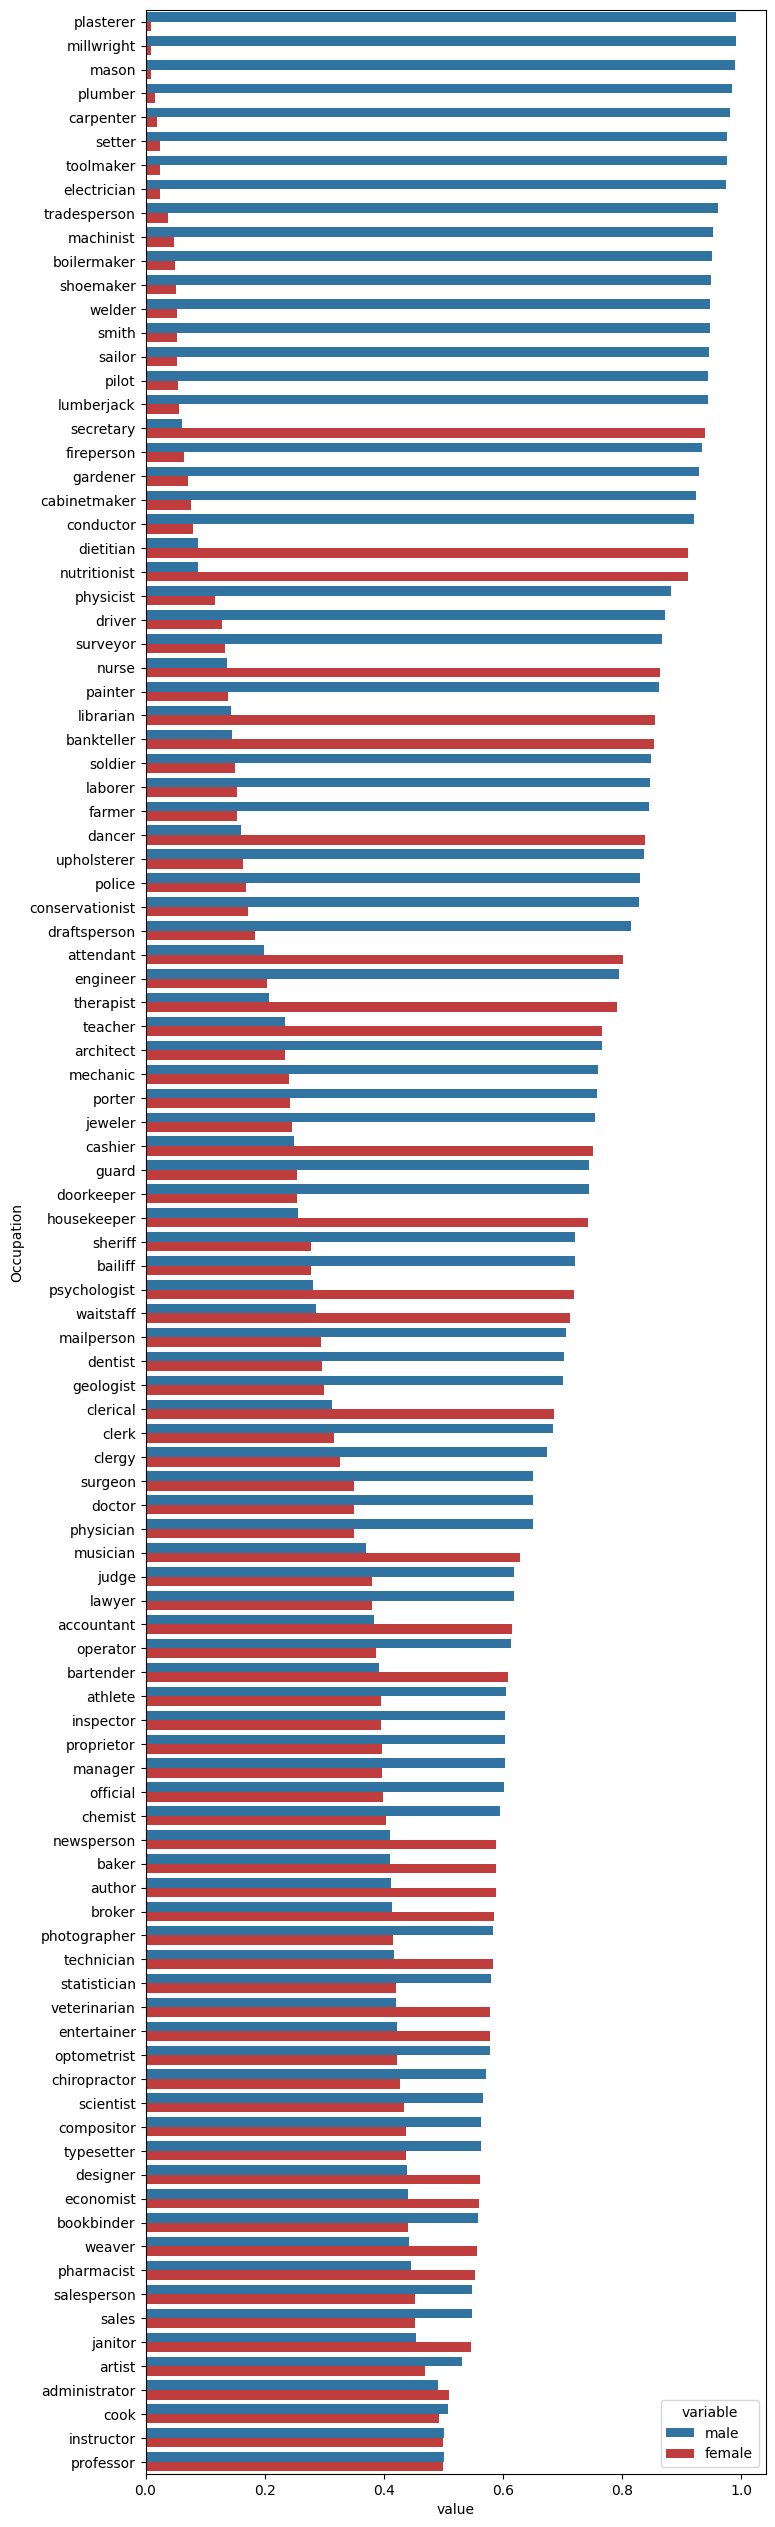

In [13]:
fig, ax = plt.subplots(figsize=(8, 32))
sns.barplot(data=df_stats_melt, y='Occupation', x='value', hue='variable', palette=palette)


In [14]:
df_stats

,Census year,Occupation,Total Weight,Female,Male
15,2015,bankteller,430230.0,0.854076,0.145924
58,2015,physician,979939.0,0.349350,0.650650
67,2015,doctor,979939.0,0.349350,0.650650
78,2015,laborer,8555210.0,0.153167,0.846833
82,2015,conservationist,46974.0,0.171499,0.828501
...,...,...,...,...,...
3189,2015,gardener,1849854.0,0.071098,0.928902
3211,2015,driver,5639552.0,0.127969,0.872031
3243,2015,housekeeper,160547.0,0.743352,0.256648
3265,2015,guard,1942441.0,0.254756,0.745244


In [15]:
df_pred = dfp.copy()
df_pred['male'] = df_pred.apply(lambda x: x['male']+(x['neutral']/2), axis=1)
df_pred['female'] = df_pred.apply(lambda x: x['female']+(x['neutral']/2), axis=1)
df_pred.drop(columns=['neutral'], inplace=True)
df_pred_melt = pd.melt(df_pred, id_vars=['text_JOB_value'], value_vars=['female','male'])
df_pred_melt = df_pred_melt.sort_values('value', ascending=False)
df_pred_melt

,text_JOB_value,variable,value
205,boilermaker,male,1.000000
204,lumberjack,male,0.975000
96,nurse,female,0.975000
202,plasterer,male,0.973684
200,shoemaker,male,0.973684
...,...,...,...
97,shoemaker,female,0.026316
201,housekeeper,male,0.026316
199,nurse,male,0.025000
101,lumberjack,female,0.025000


<Axes: xlabel='value', ylabel='text_JOB_value'>

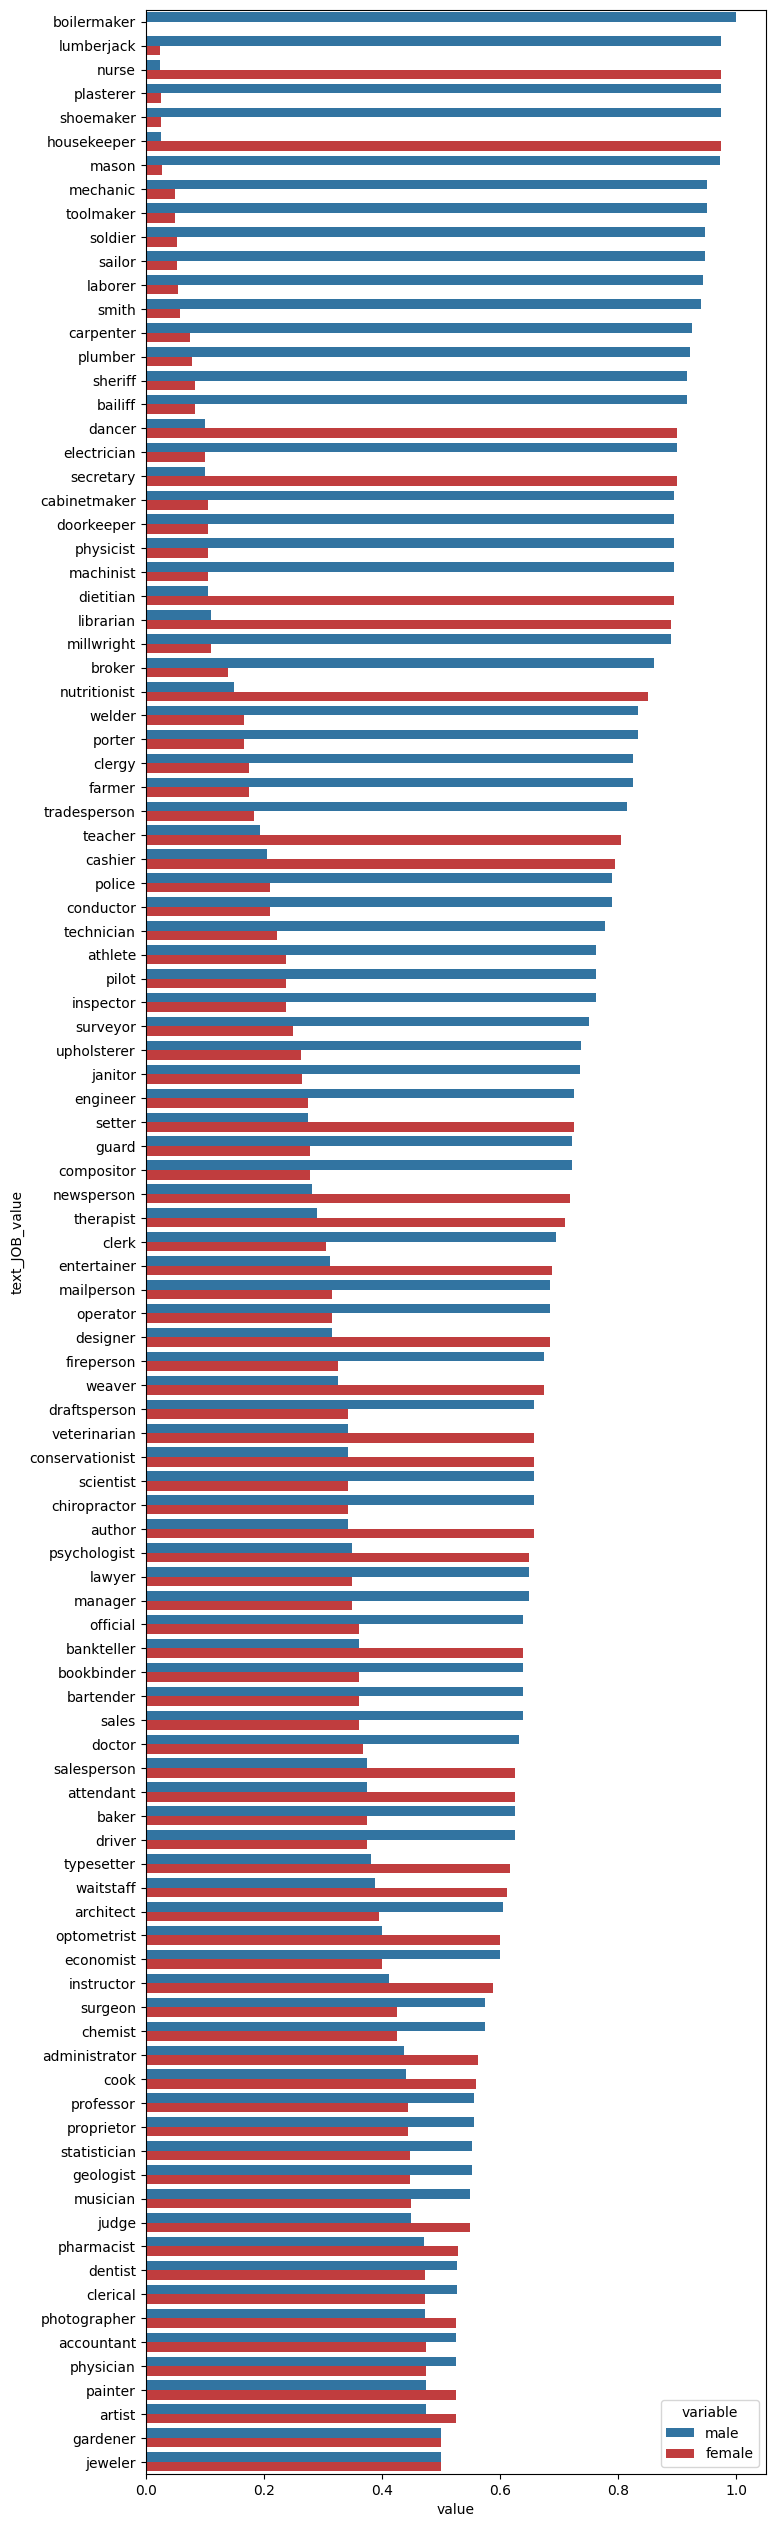

In [16]:
fig, ax = plt.subplots(figsize=(8, 32))
sns.barplot(data=df_pred_melt, y='text_JOB_value', x='value', hue='variable', palette=palette)

In [17]:
df_merged = pd.merge(df_stats, df_pred, left_on='Occupation', right_on='text_JOB_value')
df_merged = df_merged.rename(columns={'Female': 'female_stats','Male':'male_stats','female':'female_pred','male':'male_pred'})
df_merged = df_merged[['Occupation','female_stats','male_stats','male_pred','female_pred']]
df_merged['she-he_stats'] = df_merged.apply(lambda x: x['female_stats']-x['male_stats'], axis=1)
df_merged['she-he_pred'] = df_merged.apply(lambda x: x['female_pred']-x['male_pred'], axis=1)
df_merged['female_stats-pred'] = df_merged.apply(lambda x: x['female_stats']-x['female_pred'], axis=1)
df_merged['male_stats-pred'] = df_merged.apply(lambda x: x['male_stats']-x['male_pred'], axis=1)
df_merged

,Occupation,female_stats,male_stats,male_pred,female_pred,she-he_stats,she-he_pred,female_stats-pred,male_stats-pred
0,bankteller,0.854076,0.145924,0.361111,0.638889,0.708151,0.277778,0.215187,-0.215187
1,physician,0.349350,0.650650,0.525000,0.475000,-0.301299,-0.050000,-0.125650,0.125650
2,doctor,0.349350,0.650650,0.631579,0.368421,-0.301299,-0.263158,-0.019071,0.019071
3,laborer,0.153167,0.846833,0.944444,0.055556,-0.693667,-0.888889,0.097611,-0.097611
4,conservationist,0.171499,0.828501,0.342105,0.657895,-0.657002,0.315789,-0.486396,0.486396
...,...,...,...,...,...,...,...,...,...
98,gardener,0.071098,0.928902,0.500000,0.500000,-0.857804,0.000000,-0.428902,0.428902
99,driver,0.127969,0.872031,0.625000,0.375000,-0.744063,-0.250000,-0.247031,0.247031
100,housekeeper,0.743352,0.256648,0.026316,0.973684,0.486705,0.947368,-0.230332,0.230332
101,guard,0.254756,0.745244,0.722222,0.277778,-0.490489,-0.444444,-0.023022,0.023022


In [18]:
df_mms = pd.melt(df_merged, id_vars=['Occupation'], value_vars=['female_stats','male_stats'])
df_mms = df_mms.rename(columns={'variable':'label_stats','value':'value_stats'})
df_mmp = pd.melt(df_merged, id_vars=['Occupation'], value_vars=['female_pred','male_pred'])
df_mmp = df_mmp.rename(columns={'variable':'label_pred','value':'value_pred'})
df_mm = pd.merge(df_mms, df_mmp, left_on='Occupation', right_on='Occupation')
df_mm['label'] = df_mm.apply(lambda x: x['label_stats'].split('_')[0] == x['label_pred'].split('_')[0], axis=1)
df_mm = df_mm[df_mm['label']]
df_mm['label'] = df_mm.apply(lambda x: x['label_stats'].split('_')[0], axis=1)
df_mm.drop(columns=['label_stats','label_pred'], inplace=True)
df_mm

,Occupation,value_stats,value_pred,label
0,bankteller,0.854076,0.638889,female
2,physician,0.349350,0.475000,female
4,doctor,0.349350,0.368421,female
6,laborer,0.153167,0.055556,female
8,conservationist,0.171499,0.657895,female
...,...,...,...,...
403,gardener,0.928902,0.500000,male
405,driver,0.872031,0.625000,male
407,housekeeper,0.256648,0.026316,male
409,guard,0.745244,0.722222,male


In [19]:
df_lvv = pd.melt(df_mm, id_vars=['Occupation','label'], value_vars=['value_stats','value_pred'])
df_lvv

,Occupation,label,variable,value
0,bankteller,female,value_stats,0.854076
1,physician,female,value_stats,0.349350
2,doctor,female,value_stats,0.349350
3,laborer,female,value_stats,0.153167
4,conservationist,female,value_stats,0.171499
...,...,...,...,...
407,gardener,male,value_pred,0.500000
408,driver,male,value_pred,0.625000
409,housekeeper,male,value_pred,0.026316
410,guard,male,value_pred,0.722222


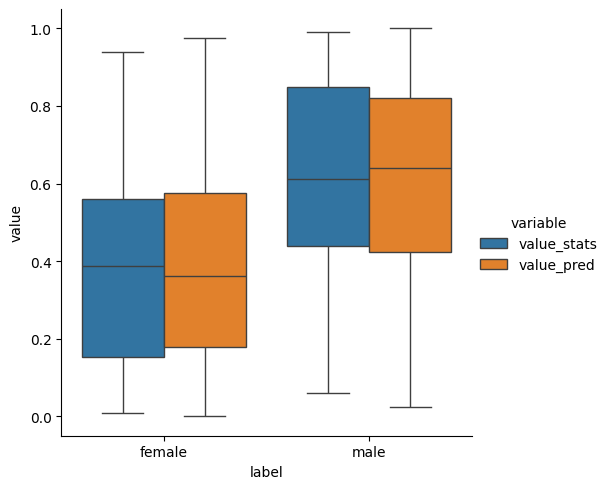

In [20]:
sns.catplot(
    data=df_lvv, x="label", y="value", hue="variable",
    kind="box", #palette=palette
)

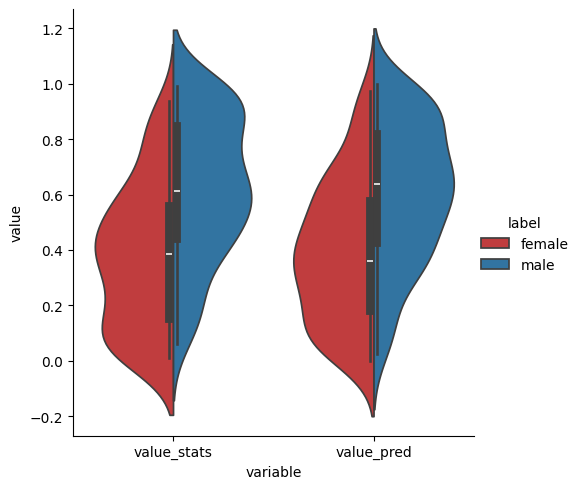

In [21]:
sns.catplot(
    data=df_lvv, x="variable", y="value", hue="label",
    kind="violin", split=True, palette=palette
)

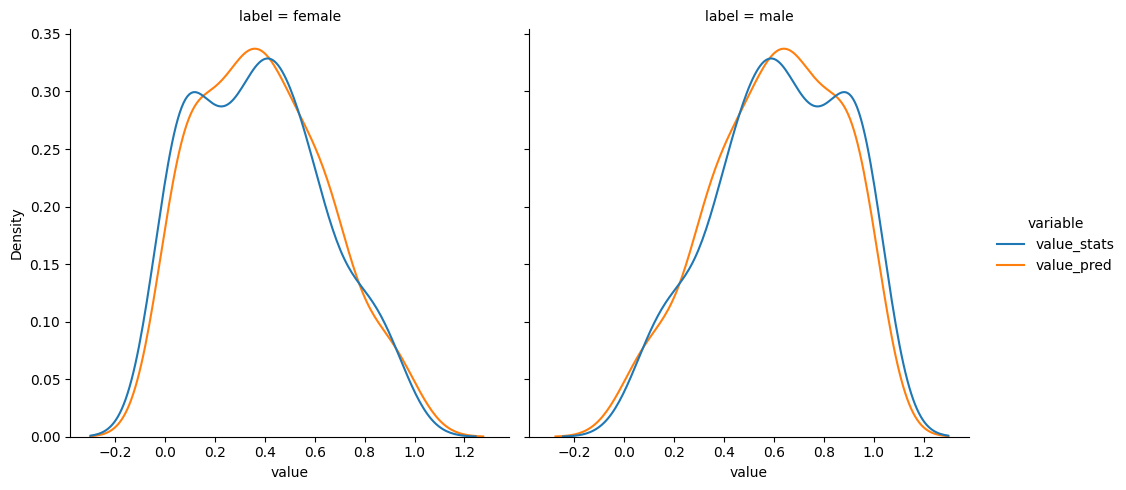

In [22]:
sns.displot(
    data=df_lvv, x="value", hue="variable", col="label", kind="kde",
)

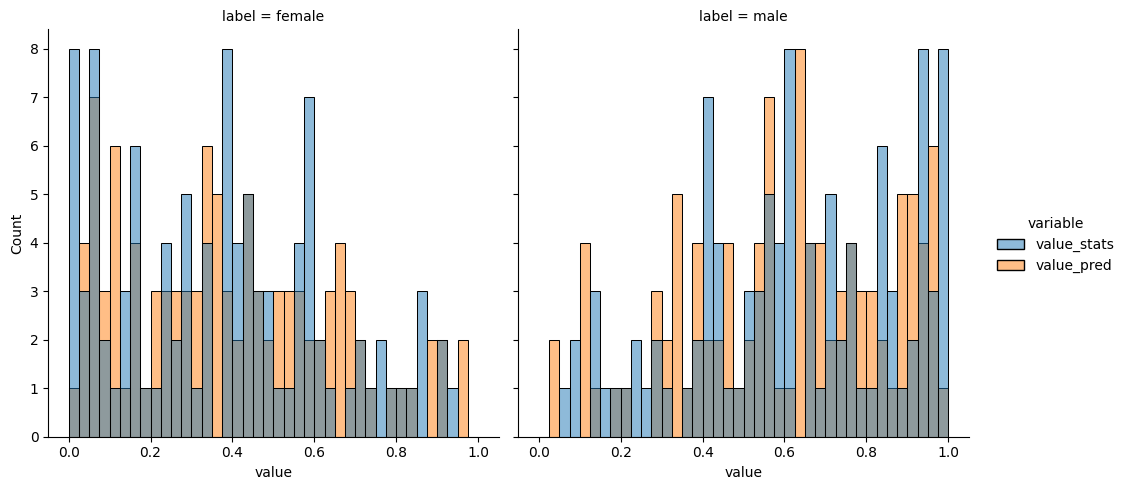

In [23]:
sns.displot(
    data=df_lvv, x="value", bins=40, hue="variable", col="label",
)

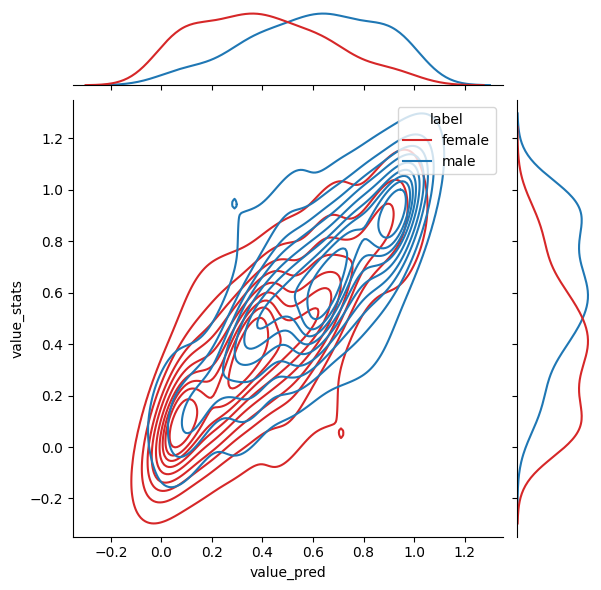

In [24]:
sns.jointplot(
    data=df_mm,
    x="value_pred", y="value_stats", hue="label",
    kind="kde",
    palette=palette
)

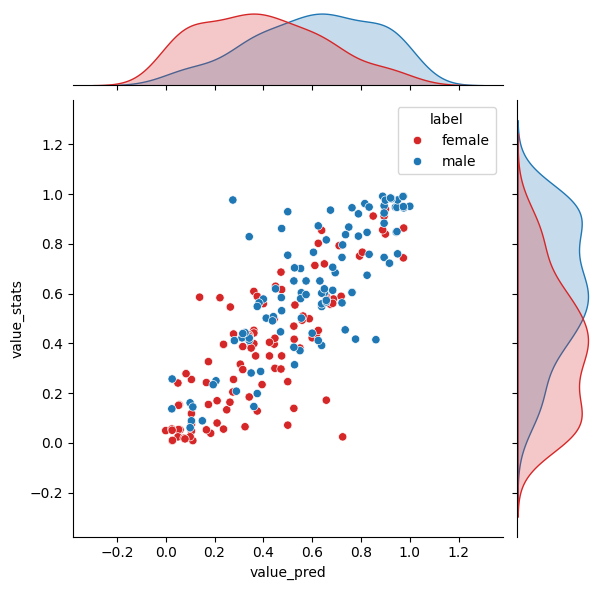

In [25]:
sns.jointplot(
    data=df_mm,
    x="value_pred", y="value_stats", hue="label",
    palette=palette
)

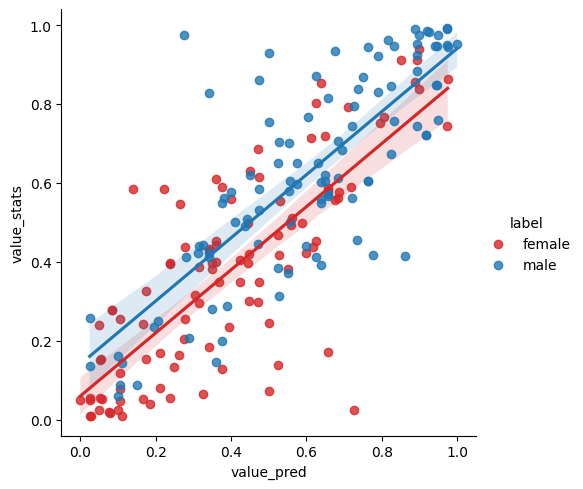

In [26]:
sns.lmplot(data=df_mm, x='value_pred', y='value_stats', hue='label', palette=palette)

Text(0.97, 0.03, 'stats')

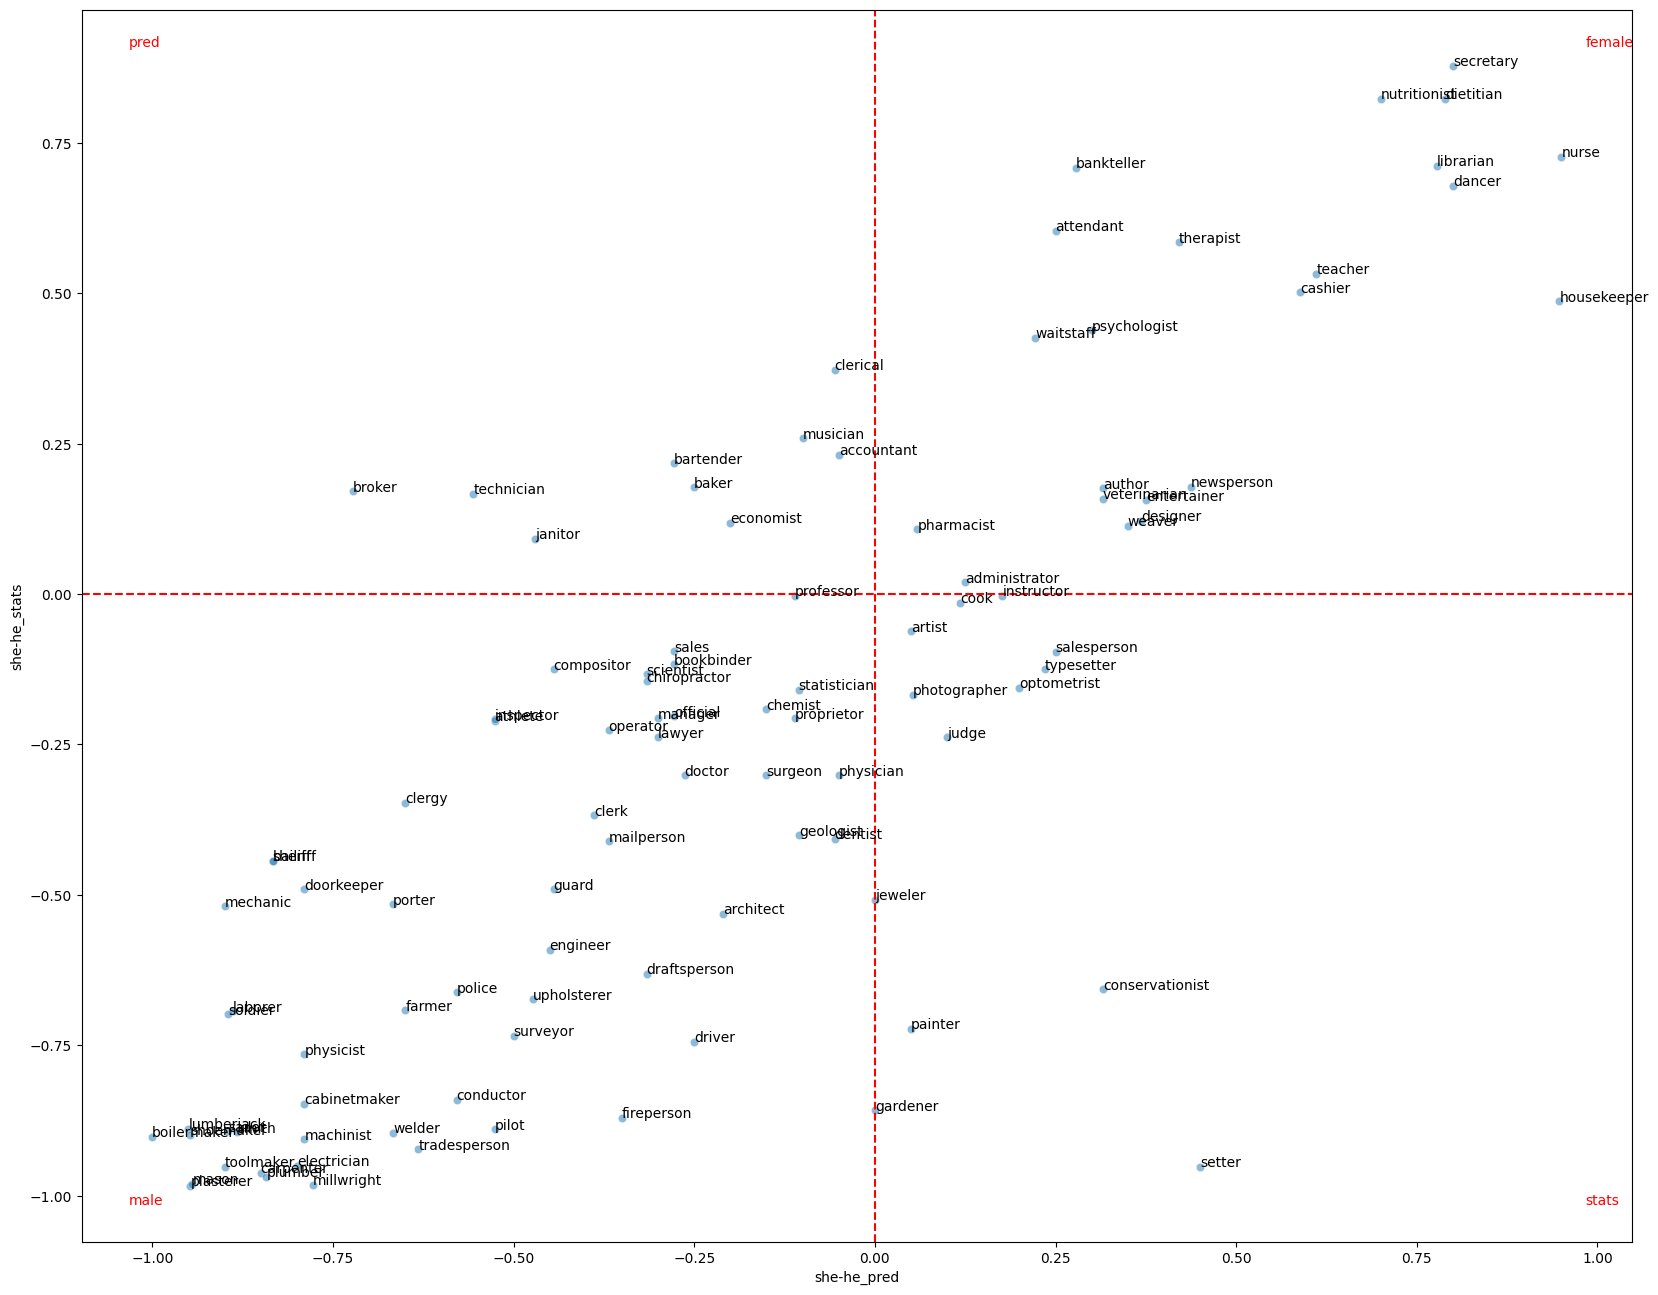

In [38]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.scatterplot(data=df_merged, x='she-he_pred', y='she-he_stats', alpha=0.5, ax=ax)
for i, txt in enumerate(df_merged['Occupation']):
    ax.annotate(txt, (df_merged['she-he_pred'].iloc[i], df_merged['she-he_stats'].iloc[i]))
ax.axvline(0, color='r', linestyle='--')
ax.axhline(0, color='r', linestyle='--')
ax.text(0.03,0.03, 'male', color='r', transform=ax.transAxes)
ax.text(0.97,0.97, 'female', color='r', transform=ax.transAxes)
ax.text(0.03,0.97, 'pred', color='r', transform=ax.transAxes)
ax.text(0.97,0.03, 'stats', color='r', transform=ax.transAxes)